In [1]:
import sys
import os
import matplotlib.pyplot as plt

# Import thư viện tự viết
sys.path.append(os.path.abspath(os.path.join('..', 'src')))
from classification_library import AirQualityLoader
from regression_library import PM25Forecaster

%matplotlib inline
print("Setup Regression Ready!")

Setup Regression Ready!


In [2]:
# 1. Load lại dữ liệu sạch
ZIP_PATH = os.path.join('..', 'data', 'raw', 'PRSA2017_Data_20130301-20170228.zip')
loader = AirQualityLoader(ZIP_PATH)
df = loader.preprocess()

# 2. Khởi tạo Forecaster và tạo Features
forecaster = PM25Forecaster(df)
# Tạo lag 1h, 3h và 24h (theo gợi ý của Lab)
df_features = forecaster.create_features(lag_hours=[1, 3, 24])

# Xem thử dữ liệu sau khi tạo features
df_features[['datetime', 'station', 'PM2.5', 'target', 'PM2.5_lag_1', 'PM2.5_lag_24']].head()

Dang doc du lieu tu: ..\data\raw\PRSA2017_Data_20130301-20170228.zip
Tim thay 12 file CSV trong file zip.
Da gop xong. Kich thuoc du lieu thô: (420768, 18)
Dang xu ly thoi gian...
Xu ly xong. Kich thuoc du lieu sach: (420768, 14)
Dang tao dac trung (Feature Engineering)...


,datetime,station,PM2.5,target,PM2.5_lag_1,PM2.5_lag_24
24,2013-03-02 00:00:00,Aotizhongxin,22.0,14.0,24.0,4.0
25,2013-03-02 01:00:00,Aotizhongxin,14.0,13.0,22.0,8.0
26,2013-03-02 02:00:00,Aotizhongxin,13.0,3.0,14.0,7.0
27,2013-03-02 03:00:00,Aotizhongxin,3.0,3.0,13.0,6.0
28,2013-03-02 04:00:00,Aotizhongxin,3.0,9.0,3.0,3.0


In [3]:
# Chọn các đặc trưng để đưa vào mô hình
features = ['PM2.5_lag_1', 'PM2.5_lag_3', 'PM2.5_lag_24', 'hour', 'month']

# Chia train/test (Mốc 2017-01-01)
train_df, test_df = forecaster.train_test_split(df_features, cutoff_date='2017-01-01')

print(f"So luong mau Train: {len(train_df)}")
print(f"So luong mau Test: {len(test_df)}")

# Train mô hình
forecaster.train(train_df, features)

Chia du lieu voi m cutoff: 2017-01-01
So luong mau Train: 402099
So luong mau Test: 16547
Bat dau train voi cac features: ['PM2.5_lag_1', 'PM2.5_lag_3', 'PM2.5_lag_24', 'hour', 'month']
Da huan luyen xong mô hinh Baseline.


KET QUA DANH GIA: RMSE=41.50, MAE=21.02


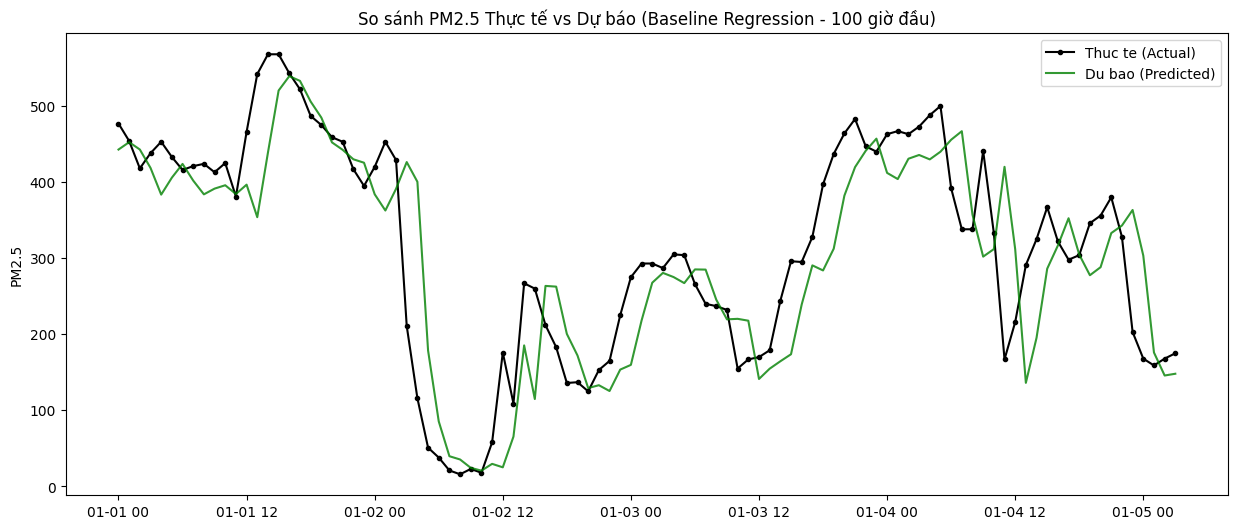

In [4]:
# Đánh giá sai số
preds = forecaster.evaluate(test_df, features)

# Vẽ biểu đồ so sánh Thực tế vs Dự báo (Chỉ vẽ 100 giờ đầu tiên cho dễ nhìn)
plt.figure(figsize=(15, 6))
# Lấy 100 điểm đầu tiên của tập test
subset_test = test_df.iloc[:100]
subset_preds = preds[:100]

plt.plot(subset_test['datetime'], subset_test['target'], label='Thuc te (Actual)', marker='.', color='black')
plt.plot(subset_test['datetime'], subset_preds, label='Du bao (Predicted)', color='green', alpha=0.8)

plt.title("So sánh PM2.5 Thực tế vs Dự báo (Baseline Regression - 100 giờ đầu)")
plt.ylabel("PM2.5")
plt.legend()
plt.show()